In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:
#Include all necessary Imports in this cell.

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel

from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,roc_curve,precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
#Read data as pandas dataframe

test_data = pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv")
train_data = pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv")
sample_data = pd.read_csv("/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv")

In [4]:
#Split the train_data to features and labels

X = pd.DataFrame(train_data.drop(labels='Made_Purchase',axis=1),columns=train_data.columns[:-1])
y = pd.DataFrame(train_data['Made_Purchase'],columns=['Made_Purchase'])

<h2>Observe the data</h2>

In [5]:
print("Training data shape: " + str(X.shape))
print("Training labels shape: " + str(y.shape))
print("Test data shape: " + str(test_data.shape))

Training data shape: (14731, 21)
Training labels shape: (14731, 1)
Test data shape: (6599, 21)


In [6]:
X.head(20)

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,4.0,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,3.0,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,3.0,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,2.0,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0
5,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,...,2.0,4.0,1.0,2.0,Returning_Visitor,Female,Required,Not Specified,Other,0.0
6,0.0,0.0,0.0,0.0,3.0,395.000000,0.000000,0.066667,0.0,0.0,...,1.0,1.0,3.0,3.0,Returning_Visitor,Female,ALL,Diploma,Married,0.0
7,0.0,0.0,0.0,0.0,7.0,280.500000,0.000000,0.028571,0.0,0.0,...,1.0,1.0,1.0,3.0,Returning_Visitor,Female,Deny,Diploma,Other,0.0
8,0.0,0.0,0.0,0.0,6.0,98.000000,0.000000,0.066667,0.0,0.0,...,2.0,5.0,1.0,3.0,Returning_Visitor,Not Specified,Deny,Graduate,Single,0.0
9,0.0,0.0,0.0,0.0,2.0,68.000000,0.000000,0.100000,0.0,0.0,...,3.0,2.0,3.0,3.0,Returning_Visitor,Male,Required,Diploma,Single,0.0


In [7]:
#Find which columns have missing values
X.isna().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
dtype: int64

In [8]:
#Observe type of data
X.dtypes

HomePage                           float64
HomePage_Duration                  float64
LandingPage                        float64
LandingPage_Duration               float64
ProductDescriptionPage             float64
ProductDescriptionPage_Duration    float64
GoogleMetric:Bounce Rates          float64
GoogleMetric:Exit Rates            float64
GoogleMetric:Page Values           float64
SeasonalPurchase                   float64
Month_SeasonalPurchase              object
OS                                 float64
SearchEngine                       float64
Zone                               float64
Type of Traffic                    float64
CustomerType                        object
Gender                              object
Cookies Setting                     object
Education                           object
Marital Status                      object
WeekendPurchase                    float64
dtype: object

In [9]:
#Observe correlation between features and possibly decide if any of them need to be dropped.
train_data.corr().round(decimals=5)

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase,Made_Purchase
HomePage,1.00000,0.59658,0.37097,0.26089,0.43876,0.37208,-0.22621,-0.31899,0.10793,-0.08392,-0.00499,-0.02331,-0.00000,-0.03759,0.02580,0.05224
HomePage_Duration,0.59658,1.00000,0.30511,0.26065,0.30381,0.38496,-0.14418,-0.20534,0.07013,-0.06767,-0.00521,-0.02397,-0.00646,-0.02124,0.02393,0.04204
LandingPage,0.37097,0.30511,1.00000,0.62142,0.37877,0.39374,-0.11984,-0.16640,0.05234,-0.04511,-0.00443,-0.03302,-0.03347,-0.03321,0.03960,0.04283
LandingPage_Duration,0.26089,0.26065,0.62142,1.00000,0.30369,0.39753,-0.07567,-0.10544,0.03914,-0.03116,-0.00119,-0.01404,-0.03634,-0.02092,0.02722,0.02715
ProductDescriptionPage,0.43876,0.30381,0.37877,0.30369,1.00000,0.84775,-0.20801,-0.29633,0.06012,-0.01099,0.00977,-0.00752,-0.04270,-0.04103,0.01553,0.06833
ProductDescriptionPage_Duration,0.37208,0.38496,0.39374,0.39753,0.84775,1.00000,-0.18086,-0.24639,0.05650,-0.02928,0.00721,-0.00341,-0.03650,-0.03103,0.00521,0.06623
GoogleMetric:Bounce Rates,-0.22621,-0.14418,-0.11984,-0.07567,-0.20801,-0.18086,1.00000,0.91707,-0.10971,0.06935,0.01889,-0.01731,-0.00823,0.08065,-0.04410,-0.05372
GoogleMetric:Exit Rates,-0.31899,-0.20534,-0.16640,-0.10544,-0.29633,-0.24639,0.91707,1.00000,-0.15927,0.09714,0.00598,-0.00844,-0.01439,0.08222,-0.06033,-0.07126
GoogleMetric:Page Values,0.10793,0.07013,0.05234,0.03914,0.06012,0.05650,-0.10971,-0.15927,1.00000,-0.05612,0.02520,0.04664,0.02090,0.01046,0.00416,0.20521
SeasonalPurchase,-0.08392,-0.06767,-0.04511,-0.03116,-0.01099,-0.02928,0.06935,0.09714,-0.05612,1.00000,0.00992,0.00835,-0.01803,0.04273,-0.01507,-0.01794


In [10]:
y.value_counts()

Made_Purchase
False            9065
True             5666
dtype: int64

In [11]:
print(train_data.corr()['Made_Purchase'])

HomePage                           0.052235
HomePage_Duration                  0.042043
LandingPage                        0.042832
LandingPage_Duration               0.027151
ProductDescriptionPage             0.068328
ProductDescriptionPage_Duration    0.066225
GoogleMetric:Bounce Rates         -0.053724
GoogleMetric:Exit Rates           -0.071258
GoogleMetric:Page Values           0.205206
SeasonalPurchase                  -0.017940
OS                                 0.001111
SearchEngine                       0.009360
Zone                              -0.011090
Type of Traffic                   -0.004270
WeekendPurchase                    0.010922
Made_Purchase                      1.000000
Name: Made_Purchase, dtype: float64


In [12]:
# #Preprocessor - 8: Simple imputer , OneHotEncoding

# num_pipe = Pipeline([('imputer',SimpleImputer(strategy="mean"))])
# cat_pipe = Pipeline([('cat_imputer',SimpleImputer(strategy="most_frequent")),('encoder',OneHotEncoder())])
# pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])

# X_pre = pre_pipe_ct.fit_transform(X)
# test_pre = pre_pipe_ct.transform(test_data)

In [13]:
# model = AdaBoostClassifier(random_state=1)
# model.fit(X_pre,y.values.ravel())

# sub = pd.DataFrame(model.predict(X_pre), columns=['Made_Purchase'])
# sub.index.name = 'id'
# sub.to_csv("submission.csv", encoding='utf-8')
                   
# output = pd.read_csv("submission.csv")

In [14]:
# sub.value_counts()

<h2>Mar 29 test</h2>

In [15]:
#Preprocessing - Neo

num_pipe = Pipeline([('imputer',KNNImputer( n_neighbors=50))])
cat_pipe = Pipeline([('cat_imputer',SimpleImputer(strategy="most_frequent"))])
# pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])
pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])

X_pre = pre_pipe_ct.fit_transform(X)
test_pre = pre_pipe_ct.transform(test_data)

In [16]:
X_pre.shape

(14731, 21)

In [17]:
# threshold = 9000

# req_indices = X_pre[:,5] <= threshold

# X_pre = X_pre[req_indices]
# y = y[req_indices]

In [18]:
X_pre.shape

(14731, 21)

In [19]:
# threshold = 1500

# req_indices = X_pre[:,1] <= threshold

# X_pre = X_pre[req_indices]
# y = y[req_indices]

In [20]:
X_pre.shape

(14731, 21)

In [21]:
# threshold = 1500

# req_indices = X_pre[:,3] <= threshold

# X_pre = X_pre[req_indices]
# y = y[req_indices]

In [22]:
X_pre.shape

(14731, 21)

In [23]:
# threshold = 100

# req_indices = X_pre[:,8] <= threshold

# X_pre = X_pre[req_indices]
# y = y[req_indices]

In [24]:
X_pre.shape

(14731, 21)

In [25]:
san_indices = np.logical_or(X_pre[:,0] != 0, X_pre[:,1] == 0)
X_pre = X_pre[san_indices]
y = y[san_indices]

san_indices_2 = np.logical_or(X_pre[:,2] != 0, X_pre[:,3] == 0)
X_pre = X_pre[san_indices_2]
y = y[san_indices_2]

san_indices_3 = np.logical_or(X_pre[:,4] != 0, X_pre[:,5] == 0)
X_pre = X_pre[san_indices_3]
y = y[san_indices_3]

In [26]:
X_pre.shape

(14602, 21)

In [27]:
# smote_nc = SMOTENC(categorical_features=[10,11,12,13,14,15,16,17,18,19,20],random_state=1)

In [28]:
# def safe_divide(a, b):
#     c = np.divide(a, b, out=np.zeros_like(a), where=(b!=0))
#     return c

# col_1 = safe_divide(X_pre[:,1],X_pre[:,0])
# col_2 = safe_divide(X_pre[:,3],X_pre[:,2])
# col_3 = safe_divide(X_pre[:,5],X_pre[:,4])

# col_1[col_1 < 0.00001] = 0
# col_1[col_1 > 10000] = 0

# col_2[col_2 < 0.00001] = 0
# col_2[col_2 > 10000] = 0

# col_3[col_3 < 0.00001] = 0
# col_3[col_3 > 10000] = 0


# # X_pre = np.column_stack([col_1,col_2,col_3,X_pre])
# # # X_pre = np.column_stack([col_1,col_2,col_3,X_pre[:,6:]])

# col_4 = (col_3 * (X_pre[:,8] + 1)) * (1 - X_pre[:,6])
# col_5 = (col_2 * (X_pre[:,8] + 1)) * (1 - X_pre[:,7])
# col_6 = (col_1 * (X_pre[:,8] + 1)) * (1 - X_pre[:,7])

# col_7 = col_4 * col_5 * col_6

# # tcol_4 = test_pre[:,2] * (test_pre[:,11] + 1) * (1 - test_pre[:,9])

# X_pre = np.column_stack([col_1,col_2,col_3,col_4,col_5,col_6,X_pre])
# # # test_pre= np.column_stack([tcol_4,test_pre])

# tcol_1 = safe_divide(test_pre[:,1],test_pre[:,0])
# tcol_2 = safe_divide(test_pre[:,3],test_pre[:,2])
# tcol_3 = safe_divide(test_pre[:,5],test_pre[:,4])

# tcol_1[tcol_1 < 0.00001] = 0
# tcol_1[tcol_1 > 10000] = 0

# tcol_2[tcol_2 < 0.00001] = 0
# tcol_2[tcol_2 > 10000] = 0

# tcol_3[tcol_3 < 0.00001] = 0
# tcol_3[tcol_3 > 10000] = 0

# tcol_4 = (tcol_3 * (test_pre[:,8] + 1)) * (1 - test_pre[:,6])
# tcol_5 = (tcol_2 * (test_pre[:,8] + 1)) * (1 - test_pre[:,7])
# tcol_6 = (tcol_1 * (test_pre[:,8] + 1)) * (1 - test_pre[:,7])

# tcol_7 = tcol_4 * tcol_5 * tcol_6

# test_pre = np.column_stack([tcol_1,tcol_2,tcol_3,tcol_4,tcol_5,tcol_6,test_pre])

In [29]:

# smote_nc = SMOTENC(categorical_features=[16,17,18,19,20,21,22,23,24,25,26],random_state=1)
# # smote_nc = SMOTENC(categorical_features=[10,11,12,13,14,15,16,17,18,19,20],random_state=1)
# X_pre,y = smote_nc.fit_resample(X_pre,y)

In [30]:
X.columns

Index(['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
       'ProductDescriptionPage', 'ProductDescriptionPage_Duration',
       'GoogleMetric:Bounce Rates', 'GoogleMetric:Exit Rates',
       'GoogleMetric:Page Values', 'SeasonalPurchase',
       'Month_SeasonalPurchase', 'OS', 'SearchEngine', 'Zone',
       'Type of Traffic', 'CustomerType', 'Gender', 'Cookies Setting',
       'Education', 'Marital Status', 'WeekendPurchase'],
      dtype='object')

In [31]:
# X_pre = np.delete(X_pre,[16,18,19,20,21,22,23,24,25,26],axis=1)
# test_pre = np.delete(test_pre,[16,18,19,20,21,22,23,24,25,26],axis=1)

In [32]:
# #Preprocessing - Neo

# num_pipe = Pipeline([('scaler',StandardScaler())])
# ncat_pipe = Pipeline([('encoder',OneHotEncoder())])
# # pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])
# pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',ncat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])

# X_pre = pre_pipe_ct.fit_transform(X_pre)
# test_pre = pre_pipe_ct.transform(test_pre)

In [33]:
ncat_pipe = Pipeline([('encoder',OneHotEncoder())])
# npre_pipe_ct = ColumnTransformer([('cats', ncat_pipe, [16,17,18,19,20,21,22,23,24,25,26])], remainder='passthrough')
npre_pipe_ct = ColumnTransformer([('cats', ncat_pipe, [10,11,12,13,14,15,16,17,18,19,20])], remainder='passthrough')
# npre_pipe_ct = ColumnTransformer([('cats', ncat_pipe, [16,17])], remainder='passthrough')


X_pre = npre_pipe_ct.fit_transform(X_pre)
test_pre = npre_pipe_ct.transform(test_pre)

In [34]:
# undersample = RandomUnderSampler(random_state=1)
# X_pre, y = undersample.fit_resample(X_pre,y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_pre,y, test_size=0.40,random_state=42)



smote_nc = SMOTENC(categorical_features=[10,11,12,13,14,15,16,17,18,19,20],random_state=1)
X_train,y_train = smote_nc.fit_resample(X_train,y_train)

In [36]:
m1 = AdaBoostClassifier()
m2 = RandomForestClassifier()
m3 = XGBClassifier(max_depth=8, learning_rate=0.01)
m4 = ExtraTreesClassifier()
estimators = [('m1',m1),('m4',m4)]

model = StackingClassifier(estimators=estimators,final_estimator=m3, passthrough=True)

In [37]:
model.fit(X_train,y_train.values.ravel())

StackingClassifier(estimators=[('m1', AdaBoostClassifier()),
                               ('m4', ExtraTreesClassifier())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None, gamma=None,
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 lea

In [38]:
print(confusion_matrix(y_test,model.predict(X_test)))

[[3205  410]
 [1033 1193]]


0.6231392008357273


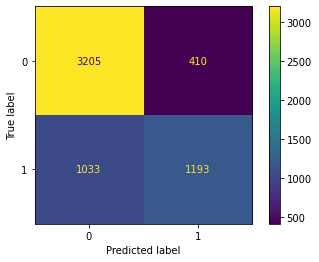

In [39]:
y_pred = model.predict(X_test)
print(f1_score(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
cm_d = ConfusionMatrixDisplay(cm)

cm_d.plot()
plt.show()

In [40]:
# skf.split(X_pre, y)

In [41]:
# #AdaBoostClassifier
# clf6 = LogisticRegression(class_weight='balanced',max_iter=500,C=0.5)
# clf7 = AdaBoostClassifier(base_estimator=clf6, random_state=1,n_estimators=50)

# params = {
#     'n_estimators':[10,50,100,500],
#     'learning_rate':[0.001,0.01,0.1,0.5,1.0]
# }

# skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

# model = GridSearchCV(estimator=AdaBoostClassifier(base_estimator=clf6, random_state=1),param_grid=params, cv=skf,scoring="f1_weighted",verbose=3)

In [42]:
# #RandomForestClassifier

# params = {
#     'criterion':['entropy','gini'],
#     'min_samples_leaf':[2,4,6,8,10],
#     'max_depth':[4,5,6,7,8],
#     'ccp_alpha':[0.001,0.01,0.02]
# }

# skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

# model = GridSearchCV(estimator=RandomForestClassifier(random_state=1,class_weight='balanced'),param_grid=params, cv=skf,scoring="f1_weighted",verbose=3)

In [43]:
# #MLPClassifier

# params = {
#     'hidden_layer_sizes': [(8,8,8), (6,8,6), (10,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.005],
#     'learning_rate': ['constant','adaptive']
# }

# skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

# model = GridSearchCV(estimator=MLPClassifier(random_state=1,max_iter=500),param_grid=params, cv=skf,scoring="f1_weighted",verbose=3)

In [44]:
# clf1 = MLPClassifier(random_state=1,max_iter=500,hidden_layer_sizes=(6,8,6), activation='relu', solver='sgd', alpha=0.0001,learning_rate='adaptive')

# clf1.fit(X_train,y_train.values.ravel())

# y_pred = clf1.predict(X_test)
# print(f1_score(y_test,y_pred))

# cm = confusion_matrix(y_test,y_pred)
# cm_d = ConfusionMatrixDisplay(cm)

# cm_d.plot()
# plt.show()

In [45]:
# model = XGBClassifier()
# model.fit(X_pre,y.values.ravel())

# sub = pd.DataFrame(model.predict(test_pre), columns=['Made_Purchase'])
# sub.replace(0,'False',inplace=True)
# sub.replace(1,'True',inplace=True)
# sub.index.name = 'id'
# sub.to_csv("submission.csv", encoding='utf-8')
                   
# output = pd.read_csv("submission.csv")

In [46]:
# model1 = AdaBoostClassifier(random_state=1,learning_rate=0.01,n_estimators=100)
# model2 = RandomForestClassifier(random_state=1,max_depth=10,criterion='entropy',ccp_alpha=0.01,min_samples_leaf=6)
# model4 = DecisionTreeClassifier(random_state=1)

# clf6 = LogisticRegression(class_weight='balanced',max_iter=500,C=0.05)
# model3 = AdaBoostClassifier(base_estimator=clf6, random_state=1,n_estimators=50)
# # model1 = AdaBoostClassifier(random_state=1)
# # model2 = RandomForestClassifier(random_state=1)

# model1.fit(X_train,y_train.values.ravel())
# y_pred_1 = model1.predict(X_test)

# model2.fit(X_train,y_train.values.ravel())
# y_pred_2 = model2.predict(X_test)

# model3.fit(X_train,y_train.values.ravel())
# y_pred_3 = model3.predict(X_test)

# model4.fit(X_train,y_train.values.ravel())
# y_pred_4 = model4.predict(X_test)

# y_new_1 = np.logical_or(y_pred_1,y_pred_3)

# y_new_2 = np.logical_or(y_pred_2,y_pred_4)

# y_new = np.logical_or(y_new_2,y_new_1)

In [47]:
# y_new[-30:]

In [48]:
# y_pred_1[-30:]

In [49]:
# y_pred_2[-30:]

In [50]:
# print(f1_score(y_test,y_new,average='weighted'))
# print(f1_score(y_test,y_new))

# cm = confusion_matrix(y_test,y_new)
# cm_d = ConfusionMatrixDisplay(cm)

# cm_d.plot()
# plt.show()

In [51]:
# clf1 = MLPClassifier(random_state=1,max_iter=500,hidden_layer_sizes=(6,8,6), activation='relu', solver='sgd', alpha=0.0001,learning_rate='adaptive')
# clf2 = RandomForestClassifier(random_state=1,max_depth=6,criterion='entropy',ccp_alpha=0.001,min_samples_leaf=6)
# clf3 = AdaBoostClassifier(random_state=1)
# clf4 = AdaBoostClassifier(random_state=42)
# clf5 = DecisionTreeClassifier(random_state=1,max_depth=5,criterion='entropy',min_samples_leaf=4)
# clf6 = LogisticRegression(class_weight='balanced',max_iter=500,C=0.5)
# clf7 = AdaBoostClassifier(base_estimator=clf6, random_state=1,n_estimators=50)
# clf8 = KNeighborsClassifier(n_neighbors=50)
# # model = VotingClassifier([('ml',clf1),('rf',clf2),('ab',clf3)])
# # model = VotingClassifier([('rf',clf3),('ab',clf7)])

# # model = clf7

# # model = SVC(kernel='poly',random_state=1)

# model.fit(X_train,y_train.values.ravel())

# y_pred = model.predict(X_test)
# print(f1_score(y_test,y_pred,average='weighted'))
# print(f1_score(y_test,y_pred))

# cm = confusion_matrix(y_test,y_pred)
# cm_d = ConfusionMatrixDisplay(cm)

# cm_d.plot()
# plt.show()

In [52]:
# # Train XGB classifier
# xgb = XGBClassifier()
# xgb.fit(X_train, y_train.values.ravel())

# # Train Random Forest classifier
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train.values.ravel())

# # Train Neural Network classifier
# nn = MLPClassifier(max_iter=500)
# nn.fit(X_train, y_train.values.ravel())

In [53]:
# xgb_preds = xgb.predict(X_train).astype(bool)
# rf_preds = rf.predict(X_train)
# nn_preds = nn.predict(X_train)

# meta_features = np.column_stack((xgb_preds, rf_preds, nn_preds))

# xgb2 = XGBClassifier()
# rf2 = RandomForestClassifier()
# xgb2.fit(meta_features, y_train.values.ravel())
# rf2.fit(meta_features, y_train.values.ravel())

# ensemble1 = VotingClassifier(
#     estimators=[
#         ('xgb', xgb), ('rf', rf)
#     ],
#     voting='soft',
#     weights=[xgb2, rf2]
# )

# ensemble1.fit(X_train, y_train.values.ravel())

In [54]:
# xgb2_preds = xgb2.predict(meta_features).astype(bool)
# rf2_preds = rf2.predict(meta_features)

# meta_features2 = np.column_stack((xgb2_preds, rf2_preds))

# xgb3 = XGBClassifier()
# rf3 = RandomForestClassifier()
# xgb3.fit(meta_features2, y_train)
# rf3.fit(meta_features2, y_train)

# ensemble2 = VotingClassifier(
#     estimators=[
#         ('xgb2', xgb2), ('rf2', rf2)
#     ],
#     voting='soft',
#     weights=[xgb3, rf3]
# )

# ensemble2.fit(meta_features, y_train)

In [55]:
# from sklearn.metrics import roc_auc_score

# # Get the predicted probabilities for the test data using ensemble3
# test_meta_features = np.column_stack((xgb.predict_proba(X_test), rf.predict_proba(X_test), xgb2.predict_proba(meta_features2), rf2.predict_proba(meta_features2)))
# ensemble2_preds = ensemble2.predict_proba(test_meta_features)

# # Calculate the ROC AUC score for the predicted probabilities
# roc_auc = roc_auc_score(y_test, ensemble2_preds[:, 1])
# print('Ensemble3 ROC AUC score:', roc_auc)

In [56]:
# # Create StratifiedKFold object with 5 folds
# skf_lite = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# # Loop through each fold and fit a ada model
# for train_index, test_index in skf_lite.split(X_pre, y):
#     X_train, y_train = X_pre[train_index], y.iloc[train_index]
#     X_test, y_test = X_pre[test_index], y.iloc[test_index]
    
#     model.fit(X_train, y_train.values.ravel())
    
#     print("Accuracy on test set:", model.score(X_test, y_test))

In [57]:
# model.best_params_

In [58]:
# # clf1 = DecisionTreeClassifier(random_state=1)
# clf2 = RandomForestClassifier(random_state=1,max_depth=8)
# model = AdaBoostClassifier(random_state=1)

# # model = VotingClassifier([('dt',clf1),('rf',clf2),('ab',clf3)])
# model = VotingClassifier([('rf',clf2),('ab',clf3)])

model.fit(X_pre,y.values.ravel())

# model1 = AdaBoostClassifier(random_state=1,learning_rate=0.01,n_estimators=100)
# model2 = RandomForestClassifier(random_state=1,max_depth=6,criterion='entropy',ccp_alpha=0.01,min_samples_leaf=6)

# clf6 = LogisticRegression(class_weight='balanced',max_iter=500,C=0.5)
# model3 = AdaBoostClassifier(base_estimator=clf6, random_state=1,n_estimators=50)

# model1.fit(X_pre,y.values.ravel())
# y_pred_1 = model1.predict(test_pre)

# model2.fit(X_pre,y.values.ravel())
# y_pred_2 = model2.predict(test_pre)

# y_new = np.logical_or(y_pred_1,y_pred_2)

# model3.fit(X_pre,y.values.ravel())
# y_pred_3 = model3.predict(test_pre)

# y_new = np.logical_or(y_pred_1,y_pred_3)

# y_new_2 = np.logical_or(y_new,y_pred_2)

sub = pd.DataFrame(model.predict(test_pre), columns=['Made_Purchase'])
sub.index.name = 'id'
sub.to_csv("submission.csv", encoding='utf-8')
                   
output = pd.read_csv("submission.csv")

In [59]:
# model.best_params_

In [60]:
sub.value_counts()

Made_Purchase
False            3999
True             2600
dtype: int64

<h2>Mar 28 Test</h2>

In [61]:
# #Preprocessing - Neo

# num_pipe = Pipeline([('imputer',SimpleImputer(strategy="mean")),('scaler',MinMaxScaler())])
# cat_pipe = Pipeline([('cat_imputer',SimpleImputer(strategy="most_frequent")),('encoder',OrdinalEncoder())])
# pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])


# X_pre = pre_pipe_ct.fit_transform(X)
# test_pre = pre_pipe_ct.transform(test_data)

In [62]:
# def safe_divide(a, b):
#     c = np.divide(a, b, out=np.zeros_like(a), where=(b!=0))
#     return c

# col_1 = safe_divide(X_pre[:,1],X_pre[:,0])
# col_2 = safe_divide(X_pre[:,3],X_pre[:,2])
# col_3 = safe_divide(X_pre[:,5],X_pre[:,4])

# col_1[col_1 < 0.00001] = 0
# col_1[col_1 > 10000] = 0

# col_2[col_2 < 0.00001] = 0
# col_2[col_2 > 10000] = 0

# col_3[col_3 < 0.00001] = 0
# col_3[col_3 > 10000] = 0


# X_pre = np.column_stack([col_1,col_2,col_3,X_pre])
# # X_pre = np.column_stack([col_1,col_2,col_3,X_pre[:,6:]])

# tcol_1 = safe_divide(test_pre[:,1],test_pre[:,0])
# tcol_2 = safe_divide(test_pre[:,3],test_pre[:,2])
# tcol_3 = safe_divide(test_pre[:,5],test_pre[:,4])

# tcol_1[tcol_1 < 0.00001] = 0
# tcol_1[tcol_1 > 10000] = 0

# tcol_2[tcol_2 < 0.00001] = 0
# tcol_2[tcol_2 > 10000] = 0

# tcol_3[tcol_3 < 0.00001] = 0
# tcol_3[tcol_3 > 10000] = 0

# # test_pre= np.column_stack([tcol_1,tcol_2,tcol_3,test_pre[:,6:]])
# test_pre= np.column_stack([tcol_1,tcol_2,tcol_3,test_pre])

In [63]:
# col_4 = X_pre[:,2] * (X_pre[:,11] + 1) * (1 - X_pre[:,9])

# tcol_4 = test_pre[:,2] * (test_pre[:,11] + 1) * (1 - test_pre[:,9])

# # X_pre = np.column_stack([col_4,X_pre])
# # test_pre= np.column_stack([tcol_4,test_pre])

In [64]:
# col_5 = X_pre[:,1] * (X_pre[:,11] + 1) * (1 - X_pre[:,9])

# tcol_5 = test_pre[:,1] * (test_pre[:,11] + 1) * (1 - test_pre[:,9])

# # X_pre = np.column_stack([col_5,X_pre])
# # test_pre= np.column_stack([tcol_5,test_pre])

In [65]:
# col_6 = X_pre[:,0] * (X_pre[:,11] + 1) * (1 - X_pre[:,9])

# tcol_6 = test_pre[:,0] * (test_pre[:,11] + 1) * (1 - test_pre[:,9])

# # X_pre = np.column_stack([col_6,X_pre])
# # test_pre= np.column_stack([tcol_6,test_pre])

In [66]:
# X_pre = np.column_stack([col_4,col_5,col_6,X_pre])
# test_pre= np.column_stack([tcol_4,tcol_5,tcol_6,test_pre])

In [67]:
# X_pre[:10,14]

In [68]:
# X_pre.shape

In [69]:
# X_pre[:30,12]

In [70]:
# X_pre[:10,:]

In [71]:
# X_pre = np.delete(X_pre,[3,4,5,6,7,8,9,10,11,17,21,24,25],axis=1)
# test_pre = np.delete(test_pre,[3,4,5,6,7,8,9,10,11,21,24,25],axis=1)

In [72]:
# X_train, X_test, y_train, y_test = train_test_split(X_pre,y, test_size=0.30,random_state=1)

In [73]:
# X_pre.shape

In [74]:
# undersample = RandomUnderSampler(random_state=1)
# X_train, y_train = undersample.fit_resample(X_train,y_train)
# # # smote_nc = SMOTENC(categorical_features=[14,15,16,17,18,19,20,21,22,23,24],random_state=1)
# # # smote_nc = SMOTENC(categorical_features=[13,14,15,16,17,18,19,20,21,22,23],random_state=1)
# # smote_nc = SMOTENC(categorical_features=[16,17,18,19,20,21,22,23,24,25,26],random_state=1)
# # # smote_nc = SMOTENC(categorical_features=[15,16,17,18,19,20,21,22,23,24,25],random_state=1)
# # X_train,y_train = smote_nc.fit_resample(X_train,y_train)

In [75]:
# y_train.value_counts()

# model = AdaBoostClassifier(random_state=1)
# # model = BaggingClassifier(random_state=1)
# model.fit(X_train,y_train.values.ravel())
# y_pred = model.predict(X_test)
# print(f1_score(y_test,y_pred))

# cm = confusion_matrix(y_test,y_pred)
# cm_d = ConfusionMatrixDisplay(cm)

# cm_d.plot()
# plt.show()

In [76]:
# undersample = RandomUnderSampler(random_state=1)
# X_pre, y = undersample.fit_resample(X_pre,y)

# # smote_nc = SMOTENC(categorical_features=[16,17,18,19,20,21,22,23,24,25,26],random_state=1)
# # X_pre,y = smote_nc.fit_resample(X_pre,y)

In [77]:
# model = AdaBoostClassifier(random_state=1)
# model.fit(X_pre,y.values.ravel())
# y_pred = model.predict(X_pre)
# print(f1_score(y,y_pred))
# # print(model.score(X_pre,y))
# cm = confusion_matrix(y,y_pred)
# cm_d = ConfusionMatrixDisplay(cm)

# cm_d.plot()
# plt.show()

In [78]:
# X_pre[8744,3]

In [79]:
# new_train_data = np.concatenate((X_pre,y.to_numpy()),axis=1)
# print(new_train_data.shape)
# np.savetxt('train_29.csv',new_train_data,delimiter=',')
# # new_train_data.to_csv("train.csv", encoding='utf-8')                 
# output = pd.read_csv("train_29.csv")

In [80]:
# X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size=0.2, random_state=1)

# n_components = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
# for n in n_components:
#     pca = PCA(n_components=n)
#     X_train_pca = pca.fit_transform(X_train)
#     X_test_pca = pca.transform(X_test)
    
# #     clf = DecisionTreeClassifier()
#     clf = AdaBoostClassifier()
#     clf.fit(X_train_pca, y_train.values.ravel())
    
#     y_pred = clf.predict(X_test_pca)
#     score = f1_score(y_test, y_pred)
    
#     print("Number of components:", n, "Accuracy:", score)

In [81]:
# pca = PCA(n_components=15)
# X_train_pca = pca.fit_transform(X_pre)
# X_test_pca = pca.transform(test_pre)

# clf = AdaBoostClassifier()
# clf.fit(X_train_pca, y.values.ravel())

# y_pred = clf.predict(X_train_pca)
# score = f1_score(y, y_pred)

# # print("Number of components:", n, "Accuracy:", score)

In [82]:
# model.fit(X_pre,y.values.ravel())

# sub = pd.DataFrame(model.predict(test_pre), columns=['Made_Purchase'])
# sub.index.name = 'id'
# sub.to_csv("submission.csv", encoding='utf-8')
                   
# output = pd.read_csv("submission.csv")

In [83]:
# sub.value_counts()

<h2>Visualizations</h2>

In [84]:
# sns.heatmap(train_data.corr(),cmap='coolwarm')
# plt.show()

In [85]:
# sns.scatterplot(data=train_data, x='GoogleMetric:Bounce Rates',y='GoogleMetric:Exit Rates',hue='Made_Purchase')
# plt.show()

In [86]:
# fig, ax = plt.subplots()
# ax.scatter(X['GoogleMetric:Page Values'],y)
# plt.show()

In [87]:
# plt.hist(X['GoogleMetric:Page Values'])
# plt.show()

<h2>Preprocessing</h2>

In [88]:
# #Max test files
# si = SimpleImputer(strategy='mean')
# new_X = si.fit_transform(X.iloc[:,[0,1,2,3,4,5,6,7,8]])

In [89]:
# new_X[:10,:]

In [90]:
# def safe_divide(a, b):
#     c = np.divide(a, b, out=np.zeros_like(a), where=(b!=0))
#     return c

# col_1 = safe_divide(new_X[:,1],new_X[:,0])
# col_2 = safe_divide(new_X[:,3],new_X[:,2])
# col_3 = safe_divide(new_X[:,5],new_X[:,4])

In [91]:
# check_arr = np.column_stack([col_1,col_2,col_3,new_X[:,6],new_X[:,7],new_X[:,8]])

In [92]:
# #new test file
# new_test = si.fit_transform(test_data.iloc[:,[0,1,2,3,4,5,6,7,8]])
# tcol_1 = safe_divide(new_test[:,1],new_test[:,0])
# tcol_2 = safe_divide(new_test[:,3],new_test[:,2])
# tcol_3 = safe_divide(new_test[:,5],new_test[:,4])

# check_test = np.column_stack([tcol_1,tcol_2,tcol_3,new_test[:,6],new_test[:,7],new_test[:,8]])

In [93]:
# X_train, X_test, y_train, y_test = train_test_split(check_arr,y, test_size=0.3,random_state=1)

In [94]:
# model = RandomForestClassifier(random_state=1)
# model.fit(X_train,y_train.values.ravel())
# y_pred = model.predict(X_test)
# print(f1_score(y_test,y_pred))

# cm = confusion_matrix(y_test,y_pred)
# cm_d = ConfusionMatrixDisplay(cm)

# cm_d.plot()
# plt.show()

In [95]:
# model = RandomForestClassifier(random_state=1)
# model.fit(check_arr,y.values.ravel())
# y_pred = model.predict(check_arr)
# print(f1_score(y,y_pred))

# cm = confusion_matrix(y,y_pred)
# cm_d = ConfusionMatrixDisplay(cm)

# cm_d.plot()
# plt.show()

In [96]:
# sub = pd.DataFrame(model.predict(check_test), columns=['Made_Purchase'])
# sub.index.name = 'id'
# sub.to_csv("submission.csv", encoding='utf-8')
                   
# output = pd.read_csv("submission.csv")

In [97]:
# sub.value_counts()

In [98]:
# col_1[:11]

In [99]:
# new_col_1 = np.where(col_1 != 0, 1, col_1)

In [100]:
# new_col_1[:11]

In [101]:
# col_2[:11]
# new_col_2 = np.where(col_2 != 0, 1, col_2)

In [102]:
# col_3[:11]
# new_col_3 = np.where(col_3 != 0, 1, col_3)

In [103]:
# print(col_1.shape)
# print(col_2.shape)
# print(col_3.shape)
# print(new_X[:,6].shape)
# print(new_X[:,7].shape)
# print(new_X[:,8].shape)

In [104]:
# check_arr.shape

In [105]:
# check_arr[:30]

In [106]:
# model = RandomForestClassifier(random_state=1)
# model.fit(check_arr,y.values.ravel())
# y_pred = model.predict(check_arr)
# print(f1_score(y,y_pred))

# cm = confusion_matrix(y,y_pred)
# cm_d = ConfusionMatrixDisplay(cm)

# cm_d.plot()
# plt.show()

In [107]:
# new_check_arr = np.column_stack([new_col_1,new_col_2,new_col_3,new_X[:,6],new_X[:,7],new_X[:,8]])

In [108]:
# model = RandomForestClassifier(random_state=1)
# model.fit(new_check_arr,y.values.ravel())
# y_pred = model.predict(new_check_arr)
# print(f1_score(y,y_pred))

# cm = confusion_matrix(y,y_pred)
# cm_d = ConfusionMatrixDisplay(cm)

# cm_d.plot()
# plt.show()

In [109]:
# #Preprocesser - 1: Simple imputer , Scaling , OrdinalEncoding , Imbalance handled  

# num_pipe = Pipeline([('imputer',SimpleImputer(strategy="mean")),('scaler',StandardScaler())])
# cat_pipe = Pipeline([('cat_imputer',SimpleImputer(strategy="most_frequent")),('encoder',OrdinalEncoder())])
# pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])

# X_pre = pre_pipe_ct.fit_transform(X)
# test_pre = pre_pipe_ct.transform(test_data)

# smote_nc = SMOTENC(categorical_features=[10,11,12,13,14,15,16,17,18,19,20],random_state=1)
# X_pre, y = smote_nc.fit_resample(X_pre,y)

In [110]:
# #Preprocessor - 2: Simple imputer , OrdinalEncoding , Imbalance handled

# num_pipe = Pipeline([('imputer',SimpleImputer(strategy="mean"))])
# cat_pipe = Pipeline([('cat_imputer',SimpleImputer(strategy="most_frequent")),('encoder',OrdinalEncoder())])
# pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])

# X_pre = pre_pipe_ct.fit_transform(X)
# test_pre = pre_pipe_ct.transform(test_data)

# smote_nc = SMOTENC(categorical_features=[10,11,12,13,14,15,16,17,18,19,20],random_state=1)
# X_pre, y = smote_nc.fit_resample(X_pre,y)

In [111]:
# X['Home'] = X.apply(lambda row: row['HomePage_Duration'] * row['HomePage'], axis=1)
# X['Land'] = X.apply(lambda row: row['LandingPage_Duration'] * row['LandingPage'], axis=1)
# X['Product'] = X.apply(lambda row: row['ProductDescriptionPage_Duration'] * row['ProductDescriptionPage'], axis=1)
# test_data['Home'] = test_data.apply(lambda row: row['HomePage_Duration'] * row['HomePage'], axis=1)
# test_data['Land'] = test_data.apply(lambda row: row['LandingPage_Duration'] * row['LandingPage'], axis=1)
# test_data['Product'] = test_data.apply(lambda row: row['ProductDescriptionPage_Duration'] * row['ProductDescriptionPage'], axis=1)

In [112]:
# X.columns

In [113]:
# X = X.iloc[:,6:]
# test_data = test_data.iloc[:,6:]

In [114]:
# X.iloc[:,15]

In [115]:
# X.Home

In [116]:
# X.columns

In [117]:
# last_cols = X.iloc[:, -3:]

# # select the remaining columns using iloc
# first_cols = X.iloc[:, :-3]

# # concatenate the last three columns with the first columns
# X = pd.concat([last_cols, first_cols], axis=1)

In [118]:
# X

In [119]:
# new_X

In [120]:
# #Preprocessor - 3: Simple imputer , Scaling , OrdinalEncoding

# num_pipe = Pipeline([('imputer',SimpleImputer(strategy="mean")),('scaler',StandardScaler())])
# # num_pipe = Pipeline([('imputer',SimpleImputer(strategy="mean")),('scaler',MinMaxScaler())])
# cat_pipe = Pipeline([('cat_imputer',SimpleImputer(strategy="most_frequent")),('encoder',OrdinalEncoder())])
# # pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5]),('cats',cat_pipe,[6,7,8,9,10,11,12,13,14,15,16,17])])
# # pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,15,16,17]),('cats',cat_pipe,[3,4,5,6,7,8,9,10,11,12,13,14])])
# pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])


# X_pre = pre_pipe_ct.fit_transform(X)
# test_pre = pre_pipe_ct.transform(test_data)

In [121]:
# X_pre[:5,:]

In [122]:
# #Preprocessing - Neo

# num_pipe = Pipeline([('imputer',SimpleImputer(strategy="mean"))])
# cat_pipe = Pipeline([('cat_imputer',SimpleImputer(strategy="most_frequent")),('encoder',OrdinalEncoder())])
# # pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5]),('cats',cat_pipe,[6,7,8,9,10,11,12,13,14,15,16,17])])
# # pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,15,16,17]),('cats',cat_pipe,[3,4,5,6,7,8,9,10,11,12,13,14])])
# pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])


# X_pre = pre_pipe_ct.fit_transform(X)
# test_pre = pre_pipe_ct.transform(test_data)

In [123]:
# print(X_pre.shape)
# print(test_pre.shape)

In [124]:
# X_pre[:5,6]

In [125]:
# def safe_divide(a, b):
#     c = np.divide(a, b, out=np.zeros_like(a), where=(b!=0))
#     return c

# col_1 = safe_divide(X_pre[:,1],X_pre[:,0])
# col_2 = safe_divide(X_pre[:,3],X_pre[:,2])
# col_3 = safe_divide(X_pre[:,5],X_pre[:,4])

# X_pre = np.column_stack([col_1,col_2,col_3,X_pre])
# # X_pre = np.column_stack([col_1,col_2,col_3,X_pre[:,6:]])

# tcol_1 = safe_divide(test_pre[:,1],test_pre[:,0])
# tcol_2 = safe_divide(test_pre[:,3],test_pre[:,2])
# tcol_3 = safe_divide(test_pre[:,5],test_pre[:,4])

# # test_pre= np.column_stack([tcol_1,tcol_2,tcol_3,test_pre[:,6:]])
# test_pre= np.column_stack([tcol_1,tcol_2,tcol_3,test_pre])

In [126]:
# print(X_pre.shape)
# print(test_pre.shape)

In [127]:
# X_pre[:5,3]

In [128]:
# X_pre[:25,5]

In [129]:
# # X_pre[:,11] = X_pre[:,11] + 1
# # test_pre[:,11] = test_pre[:,11] + 1

# X_pre[:,5] = X_pre[:,5] + 1
# test_pre[:,5] = test_pre[:,5] + 1

In [130]:
# X_pre[:25,11]

In [131]:
# X_pre[:,0]  = X_pre[:,11] * X_pre[:,0]
# test_pre[:,0]  = test_pre[:,11] * test_pre[:,0]

# X_pre[:,1]  = X_pre[:,11] * X_pre[:,1]
# test_pre[:,1]  = test_pre[:,11] * test_pre[:,1]

# X_pre[:,11]  = X_pre[:,11] * X_pre[:,2]
# test_pre[:,11]  = test_pre[:,11] * test_pre[:,2]

# X_pre[:,3]  = X_pre[:,3] + X_pre[:,4]
# test_pre[:,3]  = test_pre[:,3] + test_pre[:,4]



In [132]:
# X_pre = np.delete(X_pre,[5],axis=1)
# test_pre = np.delete(test_pre,[5],axis=1)

In [133]:
# X_pre[:10,:]

In [134]:
# X_pre[:,7]

In [135]:
# X_pre.shape

In [136]:
# train_c = np.sum(X_pre[:,[0,1,2]], axis = 1)
# test_c = np.sum(test_pre[:,[0,1,2]], axis = 1)

In [137]:
# train_c[:10]

In [138]:
# X_pre = X_pre[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
# test_pre = test_pre[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]

In [139]:
# train_c.shape

In [140]:
# X_pre.shape

In [141]:
# train_c[train_c > 3] = 10
# train_c[train_c < 4] = 0

# test_c[test_c > 3] = 10
# test_c[test_c < 4] = 0

In [142]:
# X_pre = np.c_[X_pre,train_c]
# test_pre = np.c_[test_pre,test_c]

In [143]:
# X_pre.shape

In [144]:
# X_pre[:10,15]

In [145]:
# np.savetxt('train_fe.csv',X_pre,delimiter=',')
# # new_train_data.to_csv("train.csv", encoding='utf-8')                 
# output = pd.read_csv("train_fe.csv")

In [146]:
# #Preprocessor - 4: Simple imputer , OrdinalEncoding

# num_pipe = Pipeline([('imputer',SimpleImputer(strategy="mean"))])
# cat_pipe = Pipeline([('cat_imputer',SimpleImputer(strategy="most_frequent")),('encoder',OrdinalEncoder())])
# pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])

# X_pre = pre_pipe_ct.fit_transform(X)
# test_pre = pre_pipe_ct.transform(test_data)

In [147]:
# #Preprocessor - 5: Simple imputer , Scaling , Imbalance handled , OneHotEncoding

# num_pipe = Pipeline([('imputer',SimpleImputer(strategy="mean")),('scaler',StandardScaler())])
# cat_pipe = Pipeline([('cat_imputer',SimpleImputer(strategy="most_frequent"))])
# pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])

# X_pre = pre_pipe_ct.fit_transform(X)
# test_pre = pre_pipe_ct.transform(test_data)

# smote_nc = SMOTENC(categorical_features=[10,11,12,13,14,15,16,17,18,19,20],random_state=1)
# X_pre, y = smote_nc.fit_resample(X_pre,y)

# new_pipe = ColumnTransformer([('cat',OneHotEncoder(),[10,11,12,13,14,15,16,17,18,19,20])])

# X_pre = new_pipe.fit_transform(X_pre)
# test_pre = new_pipe.transform(test_pre)

In [148]:
# #Preprocessor - 6: Simple imputer , Imbalance handled , OneHotEncoding

# num_pipe = Pipeline([('imputer',SimpleImputer(strategy="mean"))])
# cat_pipe = Pipeline([('cat_imputer',SimpleImputer(strategy="most_frequent"))])
# pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])

# X_pre = pre_pipe_ct.fit_transform(X)
# test_pre = pre_pipe_ct.transform(test_data)

# smote_nc = SMOTENC(categorical_features=[10,11,12,13,14,15,16,17,18,19,20],random_state=1)
# X_pre, y = smote_nc.fit_resample(X_pre,y)

# new_pipe = ColumnTransformer([('cat',OneHotEncoder(),[10,11,12,13,14,15,16,17,18,19,20])])

# X_pre = new_pipe.fit_transform(X_pre)
# test_pre = new_pipe.transform(test_pre)

In [149]:
# #Preprocessor - 7: Simple imputer , Scaled , OneHotEncoding

# num_pipe = Pipeline([('imputer',SimpleImputer(strategy="mean")),('scaler',StandardScaler())])
# cat_pipe = Pipeline([('cat_imputer',SimpleImputer(strategy="most_frequent")),('encoder',OneHotEncoder())])
# pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])

# X_pre = pre_pipe_ct.fit_transform(X)
# test_pre = pre_pipe_ct.transform(test_data)

In [150]:
# #Preprocessor - 8: Simple imputer , OneHotEncoding

# num_pipe = Pipeline([('imputer',SimpleImputer(strategy="mean"))])
# cat_pipe = Pipeline([('cat_imputer',SimpleImputer(strategy="most_frequent")),('encoder',OneHotEncoder())])
# pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])

# X_pre = pre_pipe_ct.fit_transform(X)
# test_pre = pre_pipe_ct.transform(test_data)

In [151]:
# #Preprocesser - 9: Simple imputer , MinMax Scaling , OrdinalEncoding , Imbalance handled  

# num_pipe = Pipeline([('imputer',SimpleImputer(strategy="mean")),('scaler',MinMaxScaler())])
# cat_pipe = Pipeline([('cat_imputer',SimpleImputer(strategy="most_frequent")),('encoder',OrdinalEncoder())])
# pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])

# X_pre = pre_pipe_ct.fit_transform(X)
# test_pre = pre_pipe_ct.transform(test_data)

# smote_nc = SMOTENC(categorical_features=[10,11,12,13,14,15,16,17,18,19,20],random_state=1)
# X_pre, y = smote_nc.fit_resample(X_pre,y)

In [152]:
# #Preprocesser - 10: Simple + KNN imputer , MinMax Scaling , OrdinalEncoding , Imbalance handled  

# num_pipe = Pipeline([('imputer',KNNImputer()),('scaler',MinMaxScaler())])
# cat_pipe = Pipeline([('cat_imputer',SimpleImputer(strategy="most_frequent")),('encoder',OrdinalEncoder())])
# pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])

# X_pre = pre_pipe_ct.fit_transform(X)
# test_pre = pre_pipe_ct.transform(test_data)

# smote_nc = SMOTENC(categorical_features=[10,11,12,13,14,15,16,17,18,19,20],random_state=1)
# X_pre, y = smote_nc.fit_resample(X_pre,y)

In [153]:
# #Preprocesser - 11: Simple + KNN imputer , MinMax Scaling , OneHotEncoder 

# num_pipe = Pipeline([('imputer',KNNImputer()),('scaler',MinMaxScaler())])
# cat_pipe = Pipeline([('cat_imputer',SimpleImputer(strategy="most_frequent")),('encoder',OneHotEncoder())])
# pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])

# X_pre = pre_pipe_ct.fit_transform(X)
# test_pre = pre_pipe_ct.transform(test_data)

In [154]:
# #Preprocessor - 12: Simple imputer , OrdinalEncoding

# num_pipe = Pipeline([('imputer',SimpleImputer(strategy="mean"))])
# cat_pipe = Pipeline([('cat_imputer',SimpleImputer(strategy="most_frequent")),('encoder',OrdinalEncoder())])
# pre_pipe_ct = ColumnTransformer([('nums',num_pipe,[0,1,2,3,4,5,6,7,8,9]),('cats',cat_pipe,[10,11,12,13,14,15,16,17,18,19,20])])

# X_pre = pre_pipe_ct.fit_transform(X)
# test_pre = pre_pipe_ct.transform(test_data)

# undersample = RandomUnderSampler(random_state=1)
# X_pre, y = undersample.fit_resample(X_pre,y)

In [155]:
# X_pre.shape

<h2>Testing phase</h2>

In [156]:
# X_pre = np.delete(X_pre,[15,21,22],axis=1)
# test_pre = np.delete(test_pre,[15,21,22],axis=1)

In [157]:
# X_train, X_test, y_train, y_test = train_test_split(X_pre,y, test_size=0.50,random_state=1)

# undersample = RandomUnderSampler(random_state=1)
# X_train, y_train = undersample.fit_resample(X_train,y_train)

# y_train.value_counts()

# model = AdaBoostClassifier(random_state=1)
# # model = BaggingClassifier(random_state=1)
# model.fit(X_train,y_train.values.ravel())
# y_pred = model.predict(X_test)
# print(f1_score(y_test,y_pred))

# cm = confusion_matrix(y_test,y_pred)
# cm_d = ConfusionMatrixDisplay(cm)

# cm_d.plot()
# plt.show()

# undersample = RandomUnderSampler(random_state=1)
# X_pre, y = undersample.fit_resample(X_pre,y)

# model = AdaBoostClassifier(random_state=1)
# model.fit(X_pre,y.values.ravel())
# y_pred = model.predict(X_pre)
# print(f1_score(y,y_pred))
# # print(model.score(X_pre,y))
# cm = confusion_matrix(y,y_pred)
# cm_d = ConfusionMatrixDisplay(cm)

# cm_d.plot()
# plt.show()

In [158]:
# model = GradientBoostingClassifier(random_state=1)
# model.fit(X_train,y_train.values.ravel())
# y_pred = model.predict(X_test)
# print(f1_score(y_test,y_pred))

# cm = confusion_matrix(y_test,y_pred)
# cm_d = ConfusionMatrixDisplay(cm)

# cm_d.plot()
# plt.show()

In [159]:
# ind = X_pre[:,8] > 0
# X_pre = X_pre[ind]
# y = y[ind]

# model = AdaBoostClassifier(random_state=1)
# model.fit(X_pre,y.values.ravel())
# y_pred = model.predict(X_pre)
# print(f1_score(y,y_pred))

# cm = confusion_matrix(y,y_pred)
# cm_d = ConfusionMatrixDisplay(cm)

# cm_d.plot()
# plt.show()

<h2>Feature Selection</h2>

In [160]:
# X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size=0.2, random_state=42)

# n_components = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# for n in n_components:
#     pca = PCA(n_components=n)
#     X_train_pca = pca.fit_transform(X_train)
#     X_test_pca = pca.transform(X_test)
    
#     clf = DecisionTreeClassifier()
#     clf.fit(X_train_pca, y_train.values.ravel())
    
#     y_pred = clf.predict(X_test_pca)
#     score = f1_score(y_test, y_pred)
    
#     print("Number of components:", n, "Accuracy:", score)

In [161]:
# X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size=0.2, random_state=42)

# n_components = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# for n in n_components:
#     pca = PCA(n_components=n)
#     X_train_pca = pca.fit_transform(X_train)
#     X_test_pca = pca.transform(X_test)
    
#     clf = DecisionTreeClassifier()
#     clf.fit(X_train_pca, y_train.values.ravel())
    
#     y_pred = clf.predict(X_train_pca)
#     score = f1_score(y_train, y_pred)
    
#     print("Number of components:", n, "Accuracy:", score)

In [162]:
# pca = PCA().fit(X_pre)

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')
# plt.show()

In [163]:
# pca = PCA(n_components=15)
# X_pre = pca.fit_transform(X_pre)
# test_pre = pca.transform(test_pre)

In [164]:
# dt_clf = DecisionTreeClassifier(random_state=1)
# dt_clf.fit(X_pre,y)

# dt_clf.feature_importances_

In [165]:
# model = SelectFromModel(dt_clf,prefit=True,max_features=15)
# model.get_support()

In [166]:
# adab_clf = AdaBoostClassifier(random_state=1)
# adab_clf.fit(X_pre,y.values.ravel())

# adab_clf.feature_importances_

In [167]:
# model = SelectFromModel(adab_clf,prefit=True,max_features=15)
# model.get_support()

In [168]:
# rf_clf = RandomForestClassifier(random_state=1)
# rf_clf.fit(X_pre,y.values.ravel())

# rf_clf.feature_importances_

In [169]:
# model = SelectFromModel(rf_clf,prefit=True,max_features=15)
# model.get_support()

<h2>Remove / Transform features</h2>

In [170]:
# ind = X_train[:,8] > 0
# X_train = X_train[ind]
# y_train = y_train[ind]

In [171]:
# X_pre = np.delete(X_pre,[8],axis=1)
# test_pre = np.delete(test_pre,[8],axis=1)

<h2>Models with HPT</h2>

In [172]:
# #RandomForestClassifier

# params = {
#     'criterion':['entropy','gini'],
#     'min_samples_leaf':[2,4,6,8,10],
#     'max_depth':[4,5,6,7,8],
#     'ccp_alpha':[0.001,0.01,0.02,0.05]
# }

# model = GridSearchCV(estimator=RandomForestClassifier(random_state=1),param_grid=params, cv=10,scoring="f1",verbose=3)

# model.fit(X_pre,y.values.ravel())

# sub = pd.DataFrame(model.predict(test_pre), columns=['Made_Purchase'])
# sub.index.name = 'id'
# sub.to_csv("submission.csv", encoding='utf-8')
                   
# output = pd.read_csv("submission.csv")

In [173]:
# #AdaBoostClassifier

# params = {
#     'n_estimators':[10,50,100,500],
#     'learning_rate':[0.001,0.01,0.1,0.5,1.0]
# }

# model = GridSearchCV(estimator=AdaBoostClassifier(random_state=1),param_grid=params, cv=10,scoring="f1",verbose=3)

# model.fit(X_pre,y.values.ravel())

# sub = pd.DataFrame(model.predict(test_pre), columns=['Made_Purchase'])
# sub.index.name = 'id'
# sub.to_csv("submission.csv", encoding='utf-8')
                   
# output = pd.read_csv("submission.csv")

In [174]:
# #XGBClassifier

# params = {
#     'max_depth':[4,5,6,7,8]
# }

# model = GridSearchCV(estimator=XGBClassifier(random_state=1,reg_lambda=0.1),param_grid=params, cv=10,scoring="f1",verbose=3)
# model.fit(X_pre,y.values.ravel())

# sub = pd.DataFrame(model.predict(test_pre), columns=['Made_Purchase'])
# sub.replace(0,'False',inplace=True)
# sub.replace(1,'True',inplace=True)
# sub.index.name = 'id'
# sub.to_csv("submission.csv", encoding='utf-8')
                   
# output = pd.read_csv("submission.csv")

In [175]:
# #MLPClassifier

# params = {
#     'hidden_layer_sizes': [(8,8,8), (6,8,6), (10,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.005],
#     'learning_rate': ['constant','adaptive']
# }

# model = GridSearchCV(estimator=MLPClassifier(random_state=1,max_iter=500),param_grid=params, cv=10,scoring="f1",verbose=3)

# model.fit(X_pre,y.values.ravel())

# sub = pd.DataFrame(model.predict(test_pre), columns=['Made_Purchase'])
# sub.index.name = 'id'
# sub.to_csv("submission.csv", encoding='utf-8')
                   
# output = pd.read_csv("submission.csv")

<h2>Models without HPT</h2>

In [176]:
# model = Perceptron(random_state=1)
# model = SVC(kernel='linear',random_state=1)
# model = DecisionTreeClassifier(random_state=1)
# model = RandomForestClassifier(random_state=1)
# model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),random_state=1)
# model = SGDClassifier(random_state=1)
# model = KNeighborsClassifier(random_state=1)
# model = MLPClassifier(random_state=1)

# model.fit(X_pre,y.values.ravel())

# sub = pd.DataFrame(model.predict(test_pre), columns=['Made_Purchase'])
# sub.index.name = 'id'
# sub.to_csv("submission.csv", encoding='utf-8')
                   
# output = pd.read_csv("submission.csv")

In [177]:
# sub.value_counts()

In [178]:
# model.coef_

In [179]:
# model = XGBClassifier()
# model.fit(X_pre,y.values.ravel())

# sub = pd.DataFrame(model.predict(test_pre), columns=['Made_Purchase'])
# sub.replace(0,'False',inplace=True)
# sub.replace(1,'True',inplace=True)
# sub.index.name = 'id'
# sub.to_csv("submission.csv", encoding='utf-8')
                   
# output = pd.read_csv("submission.csv")

In [180]:
# clf1 = DecisionTreeClassifier(random_state=1)
# clf2 = RandomForestClassifier(random_state=1,max_depth=8)
# clf3 = AdaBoostClassifier(random_state=1)

# model = VotingClassifier([('dt',clf1),('rf',clf2),('ab',clf3)])
# # model = VotingClassifier([('rf',clf2),('ab',clf3)])

# model.fit(X_pre,y.values.ravel())

# sub = pd.DataFrame(model.predict(test_pre), columns=['Made_Purchase'])
# sub.index.name = 'id'
# sub.to_csv("submission.csv", encoding='utf-8')
                   
# output = pd.read_csv("submission.csv")

<h2>Observe the fit Model</h2>

In [181]:
# sub.value_counts()

In [182]:
# y_pred = model.predict(X_pre)
# print(f1_score(y,y_pred))

In [183]:
# cm = confusion_matrix(y,y_pred)
# cm_d = ConfusionMatrixDisplay(cm)

# cm_d.plot()
# plt.show()

In [184]:
# # Predict probabilities
# y_pred_prob = model.predict_proba(X_pre)[:, 1]

# precision, recall, thresholds = precision_recall_curve(y, y_pred_prob)

# f1_scores = 2 * (precision * recall) / (precision + recall)

# best_threshold = thresholds[np.argmax(f1_scores)]
# # best_threshold = 0.48

# new_pred_prob = model.predict_proba(X_pre)[:, 1]
# new_pred = (new_pred_prob >= best_threshold).astype(int)

In [185]:
# print(best_threshold)

In [186]:
# y_pred = model.predict(X_pre)
# print(f1_score(y,y_pred))

In [187]:
# cm = confusion_matrix(y,y_pred)
# cm_d = ConfusionMatrixDisplay(cm)

# cm_d.plot()
# plt.show()

In [188]:
# new_pred_prob = model.predict_proba(test_pre)[:, 1]
# new_pred = (new_pred_prob >= best_threshold).astype(int)

# sub = pd.DataFrame(new_pred, columns=['Made_Purchase'])
# sub.index.name = 'id'
# sub.replace(0,'False',inplace=True)
# sub.replace(1,'True',inplace=True)
# sub.to_csv("submission.csv", encoding='utf-8')
                   
# output = pd.read_csv("submission.csv")

In [189]:
# sub.value_counts()

In [190]:
# y = y.to_numpy()

# wrong_indices = []
# for i in range(len(y)):
#     if y[i] != y_pred[i]:
#         wrong_indices.append(i)

# print("Indices of wrongly predicted datapoints: ", wrong_indices)

<h2>Appendix</h2>

In [191]:
# # #Handling Imbalance
# # from imblearn.over_sampling import SMOTE

# # oversample = SMOTE()
# # X_pre, y = oversample.fit_resample(X_pre,y)

# from imblearn.over_sampling import SMOTENC
# smote_nc = SMOTENC(categorical_features=[10,11,12,13,14,15,16,17,18,19,20],random_state=1)
# X_pre, y = smote_nc.fit_resample(X_pre,y)


# # print(type(X_pre))
# # print(type(y))
# # new_train_data = np.concatenate((X_pre,y.to_numpy()),axis=1)
# # print(new_train_data.shape)
# # np.savetxt('train_smotenc.csv',new_train_data,delimiter=',')
# # # new_train_data.to_csv("train.csv", encoding='utf-8')                 
# # output = pd.read_csv("train_smotenc.csv")


In [192]:
# X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size=0.2, random_state=42)

# # base_clf = DecisionTreeClassifier(max_depth=1)
# # base_clf = LogisticRegression()
# # base_clf = Perceptron()
# base_clf = SVC()
# base_clf.fit(X_train, y_train)


# y_pred_base = base_clf.predict(X_test)
# base_acc = accuracy_score(y_test, y_pred_base)


# ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1)


# ada_clf.fit(X_train, y_train)

# y_pred_ada = ada_clf.predict(X_test)
# ada_acc = accuracy_score(y_test, y_pred_ada)

# print("Base classifier accuracy:", base_acc)
# print("Adaboost classifier accuracy:", ada_acc)

# precision, recall, thresholds = precision_recall_curve(y, y_pred)

# plt.plot(recall, precision, color='b')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.show()

In [193]:
# column_names = X.columns.to_list()
# #print(column_names)

# for col in column_names:
#   print(col, X[col].unique())

# target_cols = ['Marital Status','Month_SeasonalPurchase','CustomerType','Gender','Cookies Setting','Education']

# def my_encoder(X, target_cols):
#   for a in target_cols:
#     count = 0
#     for b in X[a].unique():
#       if type(b) == str:
#         X[a] = X[a].replace(b,count)
#         count += 1

# my_encoder(X, target_cols)

# column_names = X.columns.to_list()
# #print(column_names)

# for col in column_names:
#   print(col, X[col].unique())

# my_encoder(test_data, target_cols)

# for col in column_names:
#   print(col, test_imputed[col].unique())

In [194]:
# X.columns

# X.iloc[:,11].unique()

# X['OS'].unique()

# sub.value_counts()

# X.OS
# os.remove("/kaggle/working/file_name.csv")
# X.columns
# type(X.columns)
# col_list = train_data.columns.values.tolist()
# print(col_list)
# type(col_list)
# train_data.isna()
# train_data.dtypes
# train_data.isna().sum()
# train_data.HomePage.unique()


# for x in col_list:
#     #print('?' in train_data[x].unique())
#     print(train_data[x].unique())

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy="most_frequent")
# imputed_train_data = imputer.fit_transform(train_data)

# imputed_train_data[0]

# test_data.isna().sum()

# imputed_train_data.dtype

# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy="most_frequent")
# X_i = imputer.fit_transform(X)

# sub = pd.DataFrame(model.predict(T_i), columns=['Made_Purchase'])
# sub.index.name = 'id'
# sub.to_csv("submission.csv", encoding='utf-8')

# output = pd.read_csv("submission.csv")

# sub.value_counts()

In [195]:
# # Dummy Submission

# from sklearn.dummy import DummyClassifier
# X = train_data["ProductDescriptionPage_Duration"]
# y = train_data["Made_Purchase"]

# dummy_clf = DummyClassifier(strategy="most_frequent")
# dummy_clf.fit(X, y)
# DummyClassifier(strategy='most_frequent')
# dummy_clf.predict(X)

# sub = pd.DataFrame(dummy_clf.predict(test_data["ProductDescriptionPage_Duration"]), columns=['Made_Purchase'])
# sub.index.name = 'id'
# sub.to_csv("submission.csv", encoding='utf-8')

# output = pd.read_csv("submission.csv")